# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 2

**Forkunnskaper:** Introduksjon til SciPy-notebooken og Euler-metoden. 

**Læringsmål:** Løse andreordens ODE ved Euler-Cromer-metoden. Bli kjent med SciPy-biblioteket, og benytte en funksjon fra integrate pakken for å løse ODE. 

------------------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte raskt med tiden. Vi må derfor forbedre vår numeriske metode for å få en fysisk løsning.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

## Oppgave 1 – Løsning av bevegelsesligningen ved Euler-Cromer metoden 

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

**a)** Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

L = 1
m = 5
theta0 = np.radians(180)
w0 = 0.01
T = 10

In [69]:

%matplotlib inline


def euler_cromer_approx(theta_0: float, w_0: float, dt: float, T: float) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    PARAMETERS:
    -----------
    theta_0: initial angular displacement 
    w_0: initial angular velocity
    dt: timestep
    T: max t
    
    
    RETURNS:
    --------
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values

    w_1 = w0 + dt*(alpha(theta_0))
    theta_1 = theta_0 + dt*(w_1)
    """

    data_points = int(T/dt)
    t_values = np.linspace(0, T, data_points)
    theta_values = np.zeros_like(t_values)
    theta_values[0] = theta_0
    w_values = np.zeros_like(t_values)
    w_values[0] = w_0

    for i in range(1, data_points):
        w_values[i] = w_values[i-1] + dt*(-constants.g/L * (theta_values[i-1]))
        theta_values[i] = theta_values[i-1] + dt*w_values[i]
    

    return theta_values, w_values, t_values


**b)** Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til $t = 10$ s. Bruk tidssteg $\Delta t = 0.007$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid slik den gjorde med Euler-metoden i programmeringsøvingøving 1 (oppgave 2c). Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (oppgave 2b), og bytt ut  `euler_method` med `euler_cromer_approx`. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er konservert for en *periode*,
$2 \pi \sqrt{l/g}$. Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 

5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. *Hint:* Plot for tid opp til $t = 2 \pi \sqrt{l/g}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

In [70]:
def energy_calculation(omega, theta, mass, length):
    return 0.5*mass*length**2*omega**2 + 0.5*mass*length*constants.g*theta**2

E_diff = 0.00e+00 J


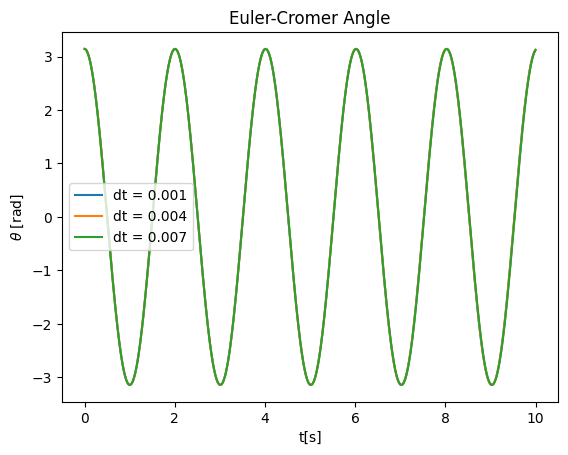

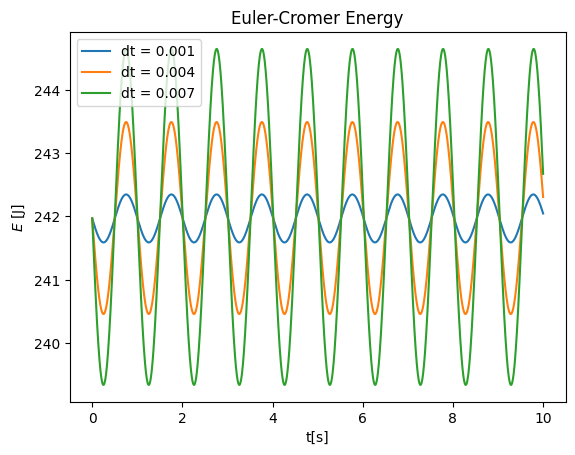

In [71]:
# SKRIV KODE HER
def plot_data(x_vals: list[np.ndarray], y_vals: list[np.ndarray], dts: list[float], title: str, x_label: str, y_label: str) -> None:
    plt.figure()
    for x_val,y_val, dt in zip(x_vals,y_vals, dts):
        plt.plot(x_val, y_val, label=f"dt = {dt}")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.savefig(f'{title}')

dt_vals = np.array([0.001,0.004,0.007])
theta_vals = []
w_vals = []
E_vals = []
t_vals = []

# Calculate theta for dt_vals
for i in range(len(dt_vals)):
    theta_val, w, t_val = euler_cromer_approx(theta0, w0, dt_vals[i], T)
    theta_vals.append(theta_val)
    w_vals.append(w)
    E = energy_calculation(w, theta_val, m, L)
    E_vals.append(E)    
    t_vals.append(t_val)
    
plot_data(t_vals, theta_vals, dt_vals, "Euler-Cromer Angle", "t[s]", r'$\theta$ [rad]')
plot_data(t_vals, E_vals, dt_vals, "Euler-Cromer Energy", "t[s]", r'$E$ [J]')



index_period = np.where(w_vals[0][1:]*w_vals[0][0:-1] < 0)[0][0]

E_diff = (energy_calculation(w_vals[0][index_period], theta_vals[0][index_period], m, L) 
        - energy_calculation(w_vals[0][0], theta_vals[0][0], m, L) )

print(f'E_diff = {E_diff:.2e} J')

**c)** Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er viktig å merke seg at svært mangle ligninger man kommer fram til i fysikken ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden. *Hint:* Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med liten vinkel tilnærmelsen sammen med vinkelutslaget som beregner fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at liten vinkel tilnærmelsen er rimelig å benytte. *Tips:* Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 
 

ValueError: x and y must have same first dimension, but have shapes (1,) and (1428,)

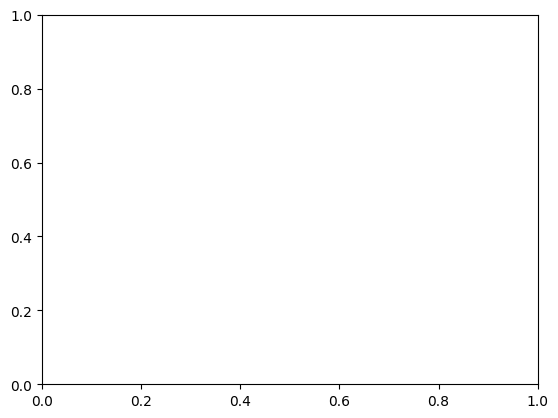

In [72]:
# SKRIV KODE HER

def euler_cromer_approx(theta_0: float, w_0: float, dt: float, T: float) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    """
    Calculates angular displacement and angular velocity using the Euler-Cromer method
    
    PARAMETERS:
    -----------
    theta_0: initial angular displacement 
    w_0: initial angular velocity
    dt: timestep
    T: max t
    
    
    RETURNS:
    --------
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values

    w_1 = w0 + dt*(alpha(theta_0))
    theta_1 = theta_0 + dt*(w_1)
    """

    data_points = int(T/dt)
    t_values = np.linspace(0, T, data_points)
    theta_values = np.zeros_like(t_values)
    theta_values[0] = theta_0
    w_values = np.zeros_like(t_values)
    w_values[0] = w_0

    for i in range(1, data_points):
        w_values[i] = w_values[i-1] + dt*(-constants.g/L * np.sin(theta_values[i-1]))
        theta_values[i] = theta_values[i-1] + dt*w_values[i]
    

    return theta_values, w_values, t_values


dt_vals = np.array([0.001,0.004,0.007])
theta_vals = []
w_vals = []
E_vals = []
# Hello
# Calculate theta for dt_vals
for i in range(len(dt_vals)):
    theta_val, w, t_vals  = euler_cromer_approx(theta0, w0, dt, T)
    theta_vals.append(theta_val)
    w_vals.append(w)
    E = energy_calculation(w, theta_val, m, L)
    E_vals.append(E)    

plot_data(t_vals, theta_vals, dt_vals, "Euler-Cromer Angle", "t[s]", r'$\theta$ [rad]')
plot_data(t_vals, E_vals, dt_vals, "Euler-Cromer Energy", "t[s]", r'$E$ [J]')



index_period = np.where(w_vals[0][1:]*w_vals[0][0:-1] < 0)[0][0]

E_diff = (energy_calculation(w_vals[0][index_period], theta_vals[0][index_period], m, L) 
        - energy_calculation(w_vals[0][0], theta_vals[0][0], m, L) )

print(E_diff)

##  Oppgave 2 – Bruk av SciPy biblioteket

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så må man lese gjennom funksjons-dokumentasjonen, sånn at man skjønner hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard under "Numeriske øvinger". **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. og 5. ordens Runge-Kutta [se programmeringsøving 3]) til å beregne usikkerheten til hvert steg. Steglengden justeres slik at ønsket usikkerhet blir oppnådd. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. Vi må derfor løse ett ligningssystem av *to* ODE-er. 

**a)** Lag en funksjon som tar inn en float `t`, og et array `vals`, og returnerer et array av de to verdiene til høyresiden av de to ODE-ene for den harmonsike pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. *Hint:* Skriv først bevegelsesligningen for pendelen som to førsteordens ODE-er (slik som ble gjort i programmeringsøving 1). 


In [ ]:
def equation(t, vals):
    """
    Calculates the value of RHS of the differentail equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float. time
    vals: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    
    # SKRIV KODE HER
    
    return [dtheta, dw]

"""
Note:
scipy.integrate.solve_ivp requires that fun returns
an object which is of type array_like. 
An ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)
so we can return a list, and do not have to first convert into an np.array. 
"""

'\nNote:\nscipy.integrate.solve_ivp requires that fun returns\nan object which is of type array_like. \nAn ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)\nso we can return a list, and do not have to first convert into an np.array. \n'

**b)** Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $t = 10$ s. Sett $\theta_0 = 0.2$ rad, og $\omega_0 = 0.0$ rad/s. Bruk tidssteg $\Delta t = 0.01$.

In [ ]:
def RK45_method(RHS, theta_0, w_0, t_1, dt):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    RHS: right hand side of differential equations
    t_1: time-value to calculate up to (e.g. 10 seconds)
    dt: timestep
    
    Returns
    -------
    theta: array of theta values
    w: array of omega values
    t: timevalues
    """
    
    # SKRIV KODE HER
    
    return theta, w, t

# PLOT VINKELUTSLAGET